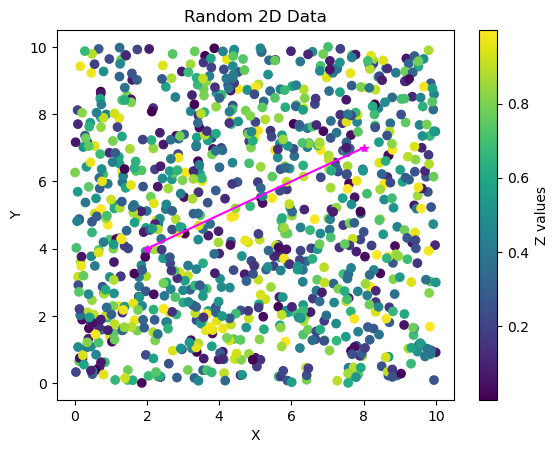

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Set grid size
n_points = 1000  # Number of points along each axis

# Generate random X and Y coordinates
X = np.random.rand(n_points) * 10  # Random values between 0 and 10
Y = np.random.rand(n_points) * 10

# Generate Z values (optional: use a mathematical function or pure randomness)
Z = np.random.rand(n_points)  # Random Z values

# Plot the data as a scatter plot
plt.scatter(X, Y, c=Z, cmap='viridis')
plt.colorbar(label='Z values')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random 2D Data')


transectx = np.array([2,8])
transecty = np.array([4,7])
plt.plot(transectx,transecty,color='magenta',marker='*')

plt.show()

In [15]:
import numpy as np

def xy_rotate(x, y, theta, xo=0, yo=0):
    """
    Rotate coordinates clockwise around a given origin.

    Parameters:
    x, y : array-like
        The original coordinates to be rotated.
    theta : float
        The angle to rotate in radians (clockwise).
    xo, yo : float, optional
        The rotation origin (default is 0, 0).
    
    Returns:
    xr, yr : array-like
        The rotated coordinates.
    """
    # Rotation matrix for clockwise rotation
    A = np.array([[np.cos(theta), np.sin(theta)],
                  [-np.sin(theta), np.cos(theta)]])
    
    # Translate and apply the rotation matrix
    coords = np.column_stack((x.flatten() - xo, y.flatten() - yo))  # Flatten and translate
    rotated_coords = coords @ A  # Matrix multiplication
    
    # Reshape the output to match the original input shape
    xr = rotated_coords[:, 0].reshape(x.shape)
    yr = rotated_coords[:, 1].reshape(y.shape)
    
    return xr, yr


In [16]:
import numpy as np

def xy_unrotate(xr, yr, theta, xo=0, yo=0):
    """
    Counterclockwise rotation and optional translation of coordinates.
    
    Parameters:
    xr, yr : array-like
        The rotated coordinates to be unrotated.
    theta : float
        The angle to rotate counterclockwise, in radians.
    xo, yo : float, optional
        The original rotation origin to translate back to (default is 0, 0).
    
    Returns:
    x_out, y_out : array-like
        The unrotated coordinates.
    """
    # Unrotate (change the sign of theta to rotate counterclockwise)
    theta = -theta

    # Rotation matrix for counterclockwise rotation
    A = np.array([[np.cos(theta), np.sin(theta)],
                  [-np.sin(theta), np.cos(theta)]])
    
    # Apply the rotation matrix
    coords = np.column_stack((xr.flatten(), yr.flatten()))  # Flatten and stack coordinates
    rotated_coords = coords @ A  # Matrix multiplication
    
    # Translate back to original origin
    x_out = rotated_coords[:, 0] + xo
    y_out = rotated_coords[:, 1] + yo
    
    # Reshape the output to match the original input shape
    x_out = x_out.reshape(xr.shape)
    y_out = y_out.reshape(yr.shape)
    
    return x_out, y_out


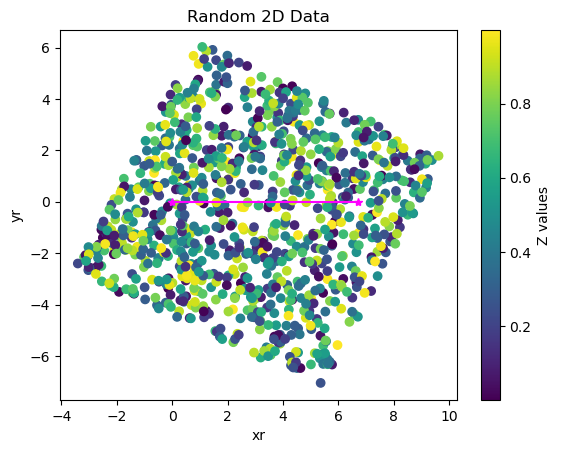

In [19]:
# Calculate the angle of the line with respect to the x-axis
dx = transectx[1] - transectx[0]
dy = transecty[1] - transecty[0]
theta = np.arctan2(dy, dx)  # Angle in radians

# Rotate the coordinates to make the line horizontal
# We will rotate the line by -theta to make it horizontal
xtr, ytr = xy_rotate(transectx, transecty, -theta, xo=transectx[0], yo=transecty[0])

# Rotate the random data by the same angle
xr, yr = xy_rotate(X, Y, -theta, xo=transectx[0], yo=transecty[0])


# Plot the data as a scatter plot
plt.scatter(xr, yr, c=Z, cmap='viridis')
plt.colorbar(label='Z values')
plt.xlabel('xr')
plt.ylabel('yr')
plt.title('Random 2D Data')

plt.plot(xtr,ytr,color='magenta',marker='*')

In [ ]:
import laspy

# Define your bounding box (xmin, xmax, ymin, ymax, zmin, zmax)
xmin, xmax = 100, 200  # X range
ymin, ymax = 100, 200  # Y range
zmin, zmax = 0, 50     # Z range (optional, if you care about elevation filtering)

# Open the LAS/LAZ file in read mode
with laspy.open('your_file.las') as las_file:
    # Iterate over the points in chunks, avoiding loading all data into memory
    for points in las_file.chunk_iterator(100000):  # Adjust chunk size as needed
        # Get point coordinates (x, y, z)
        x = points.x
        y = points.y
        z = points.z

        # Apply the bounding box filter
        inside_box = (x >= xmin) & (x <= xmax) & (y >= ymin) & (y <= ymax) & (z >= zmin) & (z <= zmax)

        # Extract the points within the bounding box
        filtered_points = points[inside_box]

        # Do something with filtered_points (e.g., save, process, etc.)
        print(f"Filtered {len(filtered_points)} points within the bounding box")
